# **DSA210 TERM PROJECT**

# Import necessary libraries and pull the data of the first dataset


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [2]:
file_path = "dataset.csv"
df = pd.read_csv(file_path)
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,65,1,1,1,2,2,1,2,2,2,2,2,2,1,NO
1,F,55,1,2,2,1,1,2,2,2,1,1,1,2,2,NO
2,F,78,2,2,1,1,1,2,1,2,1,1,2,1,1,YES
3,M,60,2,1,1,1,2,1,2,1,1,2,1,2,2,YES
4,F,80,1,1,2,1,1,2,1,2,1,1,1,1,2,NO


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 3000 non-null   object
 1   AGE                    3000 non-null   int64 
 2   SMOKING                3000 non-null   int64 
 3   YELLOW_FINGERS         3000 non-null   int64 
 4   ANXIETY                3000 non-null   int64 
 5   PEER_PRESSURE          3000 non-null   int64 
 6   CHRONIC_DISEASE        3000 non-null   int64 
 7   FATIGUE                3000 non-null   int64 
 8   ALLERGY                3000 non-null   int64 
 9   WHEEZING               3000 non-null   int64 
 10  ALCOHOL_CONSUMING      3000 non-null   int64 
 11  COUGHING               3000 non-null   int64 
 12  SHORTNESS_OF_BREATH    3000 non-null   int64 
 13  SWALLOWING_DIFFICULTY  3000 non-null   int64 
 14  CHEST_PAIN             3000 non-null   int64 
 15  LUNG_CANCER          

In [4]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,55.169000,1.491000,1.514000,1.494000,1.499000,1.509667,1.489667,1.506667,1.497333,1.491333,1.510667,1.488000,1.489667,1.498667
std,14.723746,0.500002,0.499887,0.500047,0.500082,0.499990,0.499977,0.500039,0.500076,0.500008,0.499970,0.499939,0.499977,0.500082
min,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,42.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,55.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000
75%,68.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,80.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


Changing the number 1s and 2s into No's and Yes's, M to Male and F to Female for better visualization.

In [5]:
binary_columns = [
    "SMOKING", "YELLOW_FINGERS", "PEER_PRESSURE", "CHRONIC_DISEASE",
    "FATIGUE", "ALLERGY", "WHEEZING", "ALCOHOL_CONSUMING", "ANXIETY",
    "COUGHING", "SHORTNESS_OF_BREATH", "SWALLOWING_DIFFICULTY", "CHEST_PAIN"
]

# Map 1 -> 'No', 2 -> 'Yes'
df[binary_columns] = df[binary_columns].replace({1: "No", 2: "Yes"})
df["GENDER"] = df["GENDER"].replace({"M": "Male", "F": "Female"})

Total distribution of cancer patients and healthy patients.

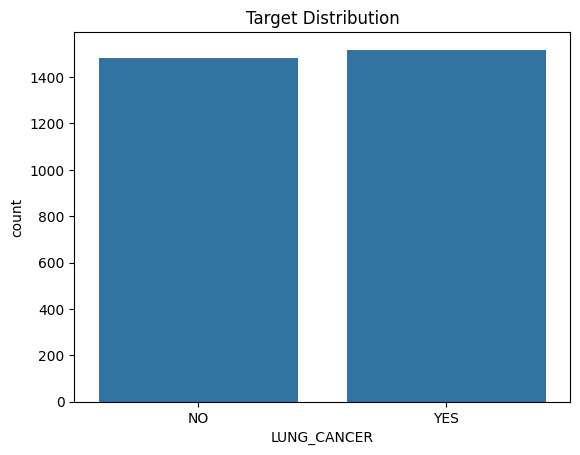

In [6]:
sns.countplot(x='LUNG_CANCER', data=df,)
plt.title('Target Distribution');

Plotting the most common assumptions for the causes of Lung Cancers.

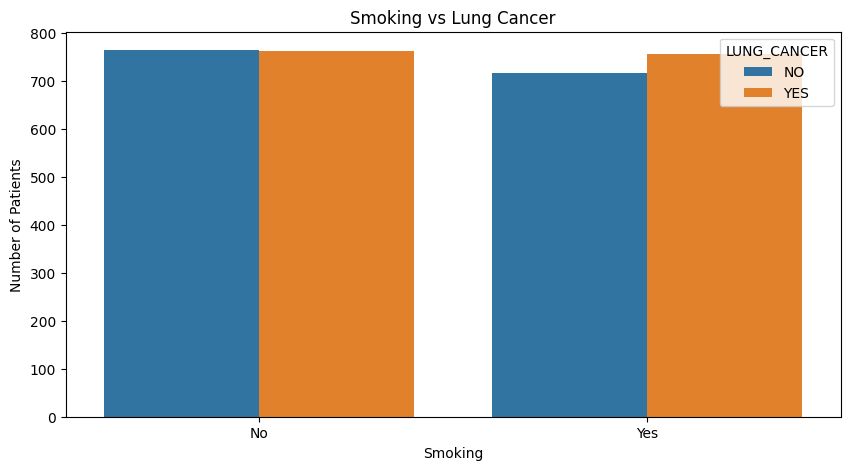

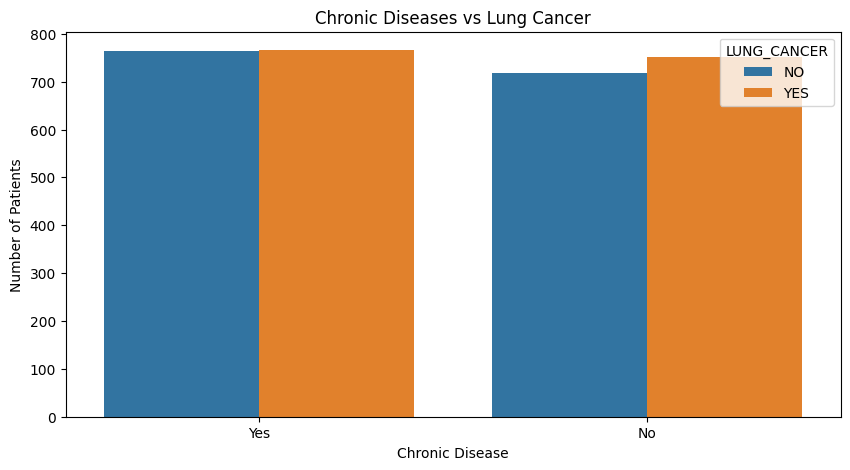

In [7]:
plt.figure(figsize=(10, 5))
sns.countplot(x="SMOKING", hue="LUNG_CANCER", data=df)
plt.title("Smoking vs Lung Cancer")
plt.xlabel("Smoking")
plt.ylabel("Number of Patients")
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(x="CHRONIC_DISEASE", hue="LUNG_CANCER", data=df)
plt.title("Chronic Diseases vs Lung Cancer")
plt.xlabel("Chronic Disease")
plt.ylabel("Number of Patients")
plt.show()


Age distributions of patients for Lung Cancer and Smoking

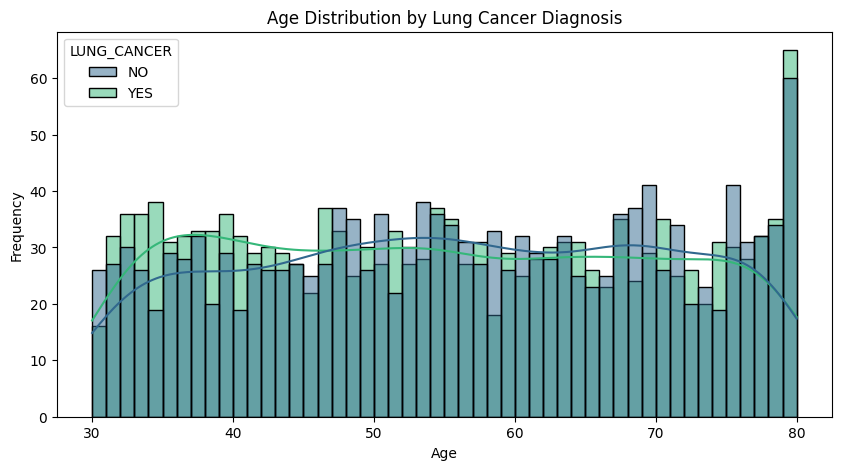

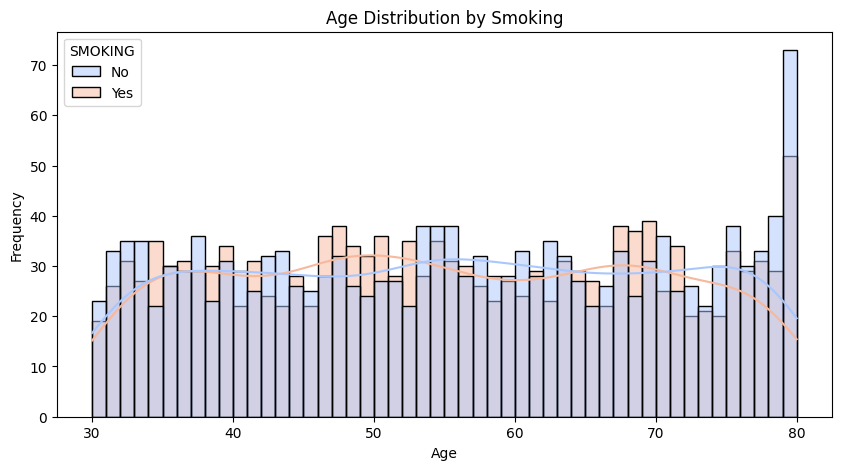

Mean Age: 55.169
Median Age: 55.0
Mode Age: 54


In [8]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x="AGE", hue="LUNG_CANCER", kde=True, bins=50, palette="viridis")
plt.title("Age Distribution by Lung Cancer Diagnosis")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(data=df, x="AGE", hue="SMOKING", kde=True, bins=50, palette="coolwarm")
plt.title("Age Distribution by Smoking")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

mean_age = df['AGE'].mean()
median_age = df['AGE'].median()
mode_age = df['AGE'].mode()[0]

print(f"Mean Age: {mean_age}")
print(f"Median Age: {median_age}")
print(f"Mode Age: {mode_age}")

Male/Female Ratio

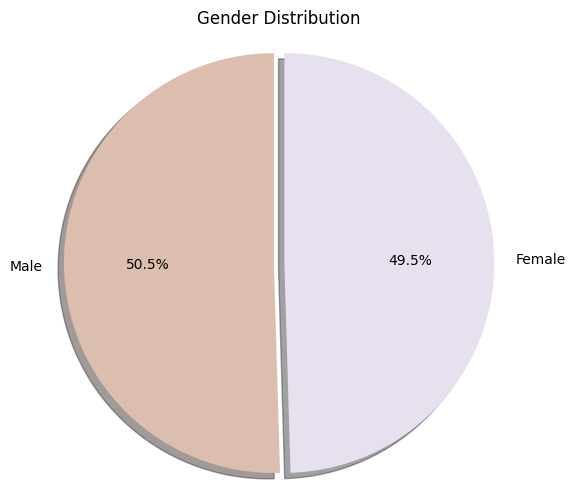

In [9]:
df["GENDER"] = df["GENDER"].replace({"M": "Male", "F": "Female"})

gender_counts = df["GENDER"].value_counts()

colors = ["#dcbeaf", "#e7e0ee"]
explode = (0.05, 0)

plt.figure(figsize=(6, 6))
plt.pie(
    gender_counts,
    labels=gender_counts.index,
    autopct="%1.1f%%",
    startangle=90,
    colors=colors,
    explode=explode,
    shadow=True
)
plt.title("Gender Distribution")
plt.axis("equal")
plt.show()

Some Columns of Possible Causes vs Age Using Violin Graphs

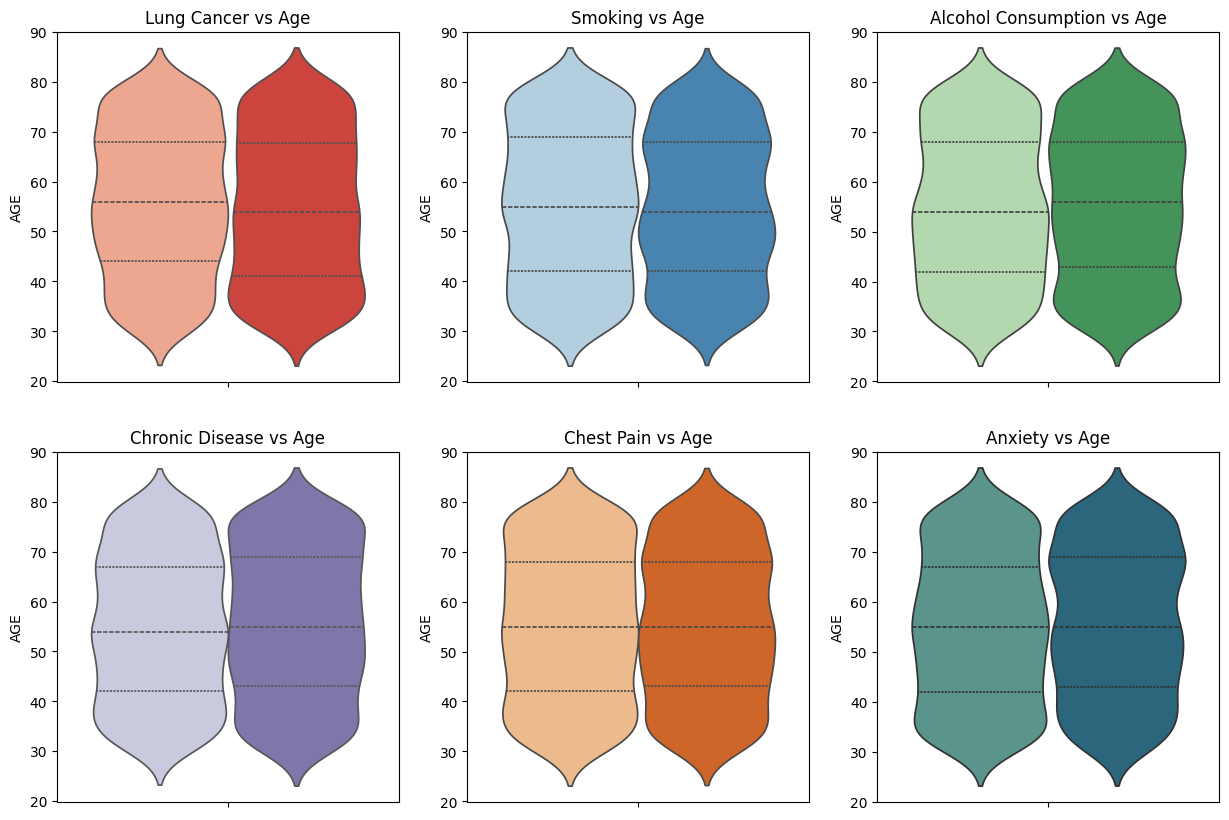

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

sns.violinplot(hue="LUNG_CANCER", y="AGE", data=df, inner="quartile", ax=axes[0][0], palette="Reds", legend=False)
axes[0][0].set_title("Lung Cancer vs Age")

sns.violinplot(hue="SMOKING", y="AGE", data=df, inner="quartile", ax=axes[0][1], palette="Blues", legend=False)
axes[0][1].set_title("Smoking vs Age")

sns.violinplot(hue="ALCOHOL_CONSUMING", y="AGE", data=df, inner="quartile", ax=axes[0][2], palette="Greens", legend=False)
axes[0][2].set_title("Alcohol Consumption vs Age")

sns.violinplot(hue="CHRONIC_DISEASE", y="AGE", data=df, inner="quartile", ax=axes[1][0], palette="Purples", legend=False)
axes[1][0].set_title("Chronic Disease vs Age")

sns.violinplot(hue="CHEST_PAIN", y="AGE", data=df, inner="quartile", ax=axes[1][1], palette="Oranges", legend=False)
axes[1][1].set_title("Chest Pain vs Age")

sns.violinplot(hue="ANXIETY", y="AGE", data=df, inner="quartile", ax=axes[1][2], palette="crest", legend=False)
axes[1][2].set_title("Anxiety vs Age")

plt.show()

All Columns vs Lung Cancer

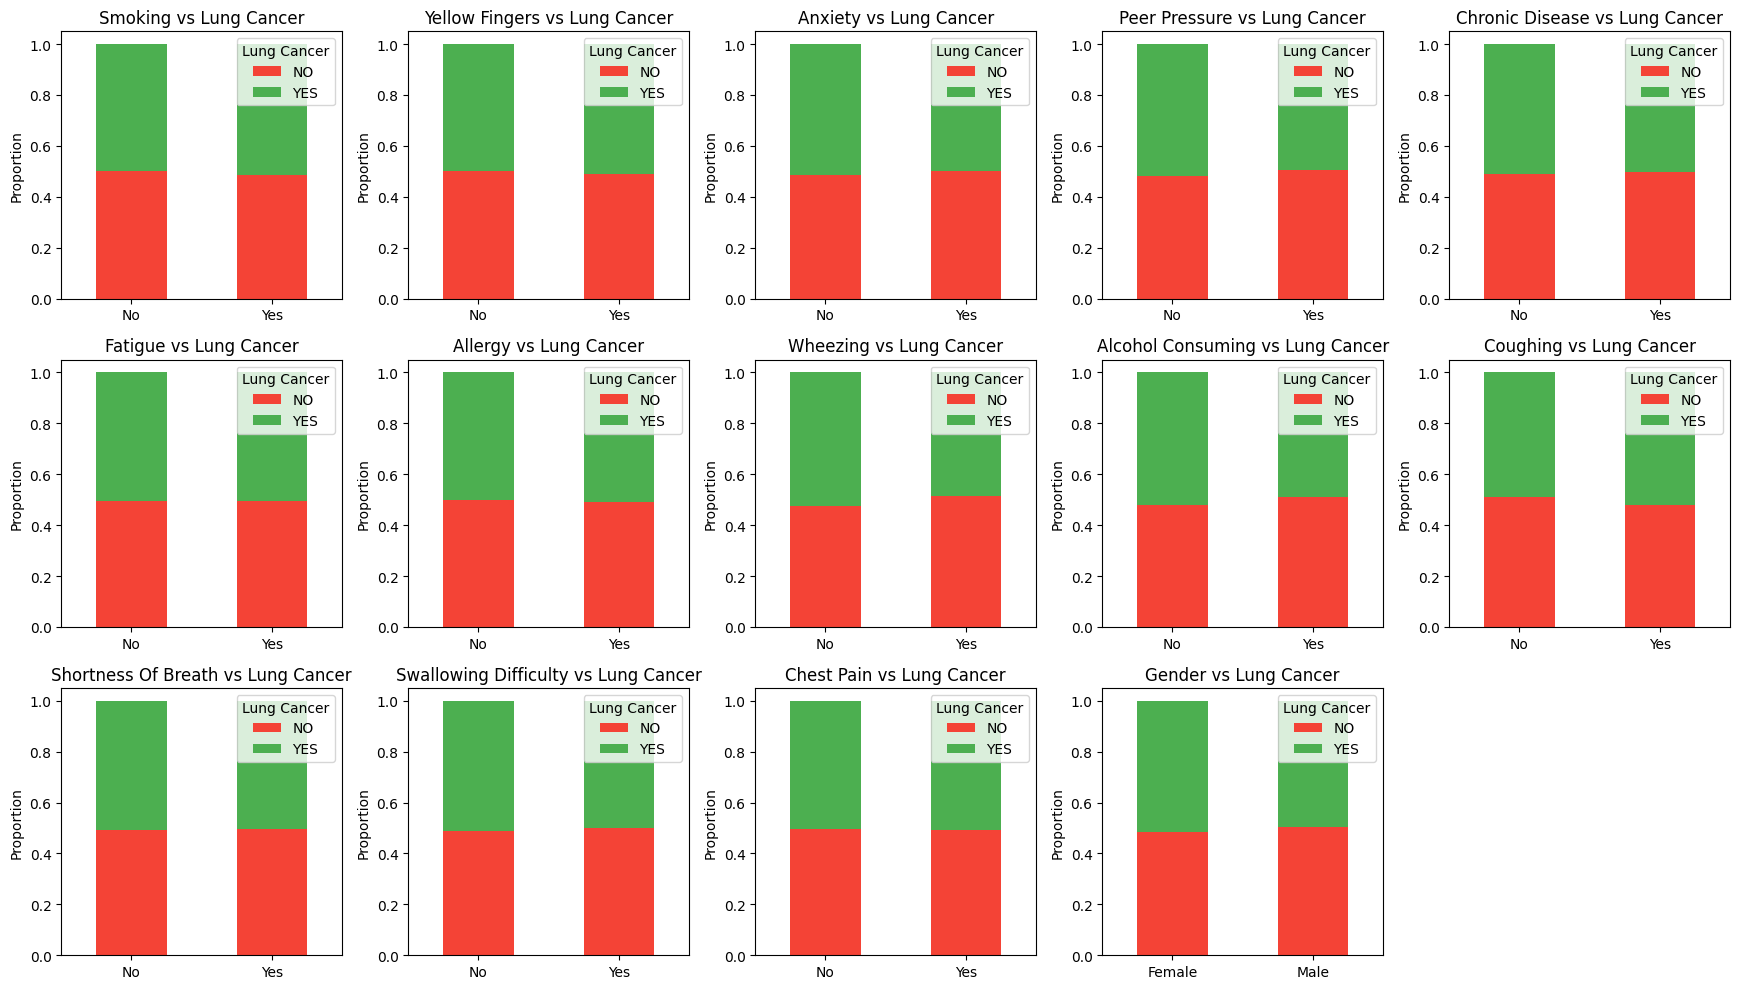

In [11]:
features = [
    "SMOKING", "YELLOW_FINGERS", "ANXIETY", "PEER_PRESSURE", "CHRONIC_DISEASE",
    "FATIGUE", "ALLERGY", "WHEEZING", "ALCOHOL_CONSUMING", "COUGHING",
    "SHORTNESS_OF_BREATH", "SWALLOWING_DIFFICULTY", "CHEST_PAIN", "GENDER", "AGE"
]

fig, axes = plt.subplots(3, 5, figsize=(17.5, 10))
axes = axes.flatten()

for i, feature in enumerate(features):
    if feature == "AGE":
        axes[i].axis('off')
        continue
    crosstab = pd.crosstab(df[feature], df["LUNG_CANCER"], normalize='index')
    crosstab.plot(kind='bar', stacked=True, ax=axes[i], color=["#F44336", "#4CAF50"])

    axes[i].set_title(f"{feature.replace('_', ' ').title()} vs Lung Cancer")
    axes[i].set_ylabel("Proportion")
    axes[i].set_xlabel("")
    axes[i].legend(title="Lung Cancer", loc='upper right')

    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=0)

for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

Correlation Matrix of Lung Cancer Dataset 1

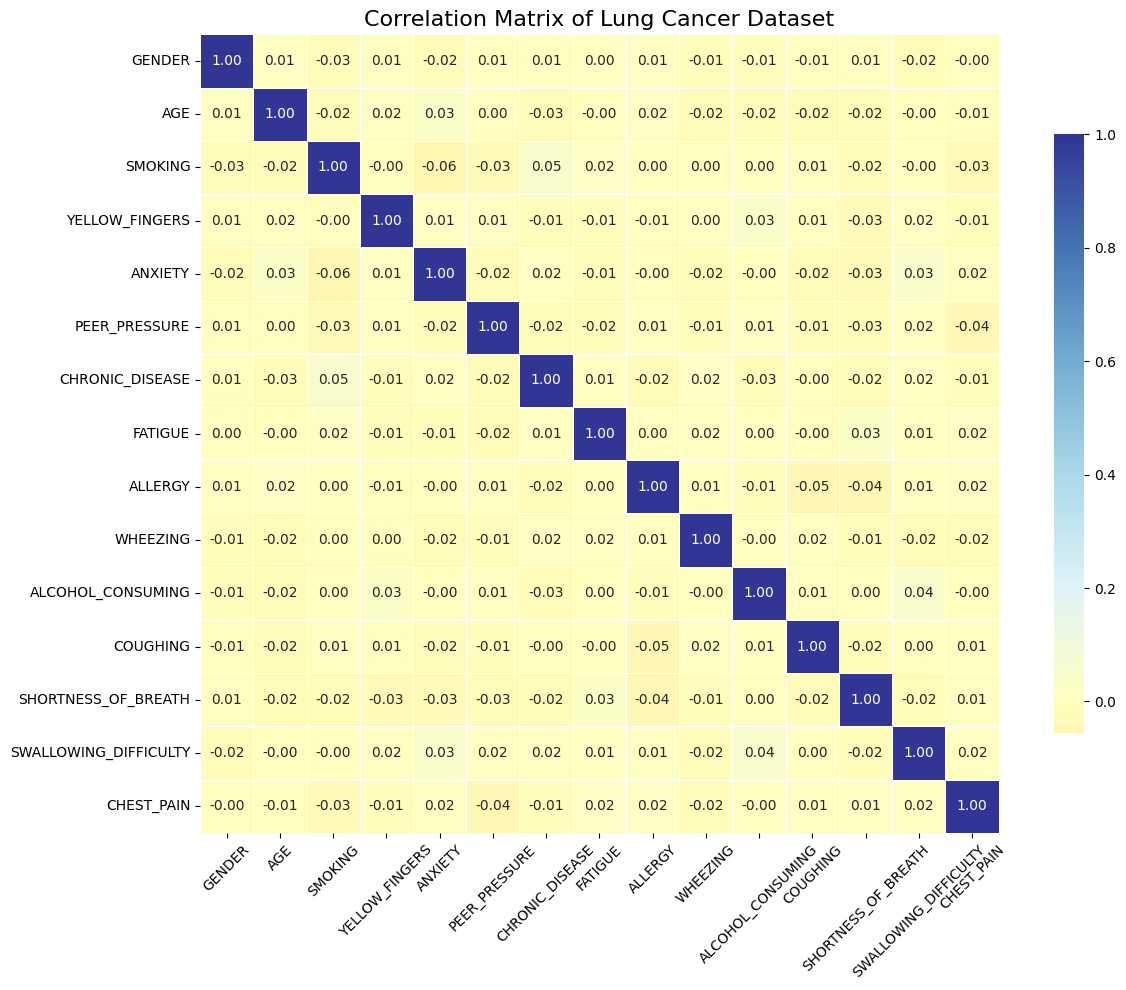

In [12]:
df_encoded = df.copy()
yes_no_map = {"Yes": 1, "No": 0}
gender_map = {"Male": 1, "Female": 0}

yes_no_columns = [
    "SMOKING", "YELLOW_FINGERS", "ANXIETY", "PEER_PRESSURE",
    "CHRONIC_DISEASE", "FATIGUE", "ALLERGY", "WHEEZING", "ALCOHOL_CONSUMING",
    "COUGHING", "SHORTNESS_OF_BREATH", "SWALLOWING_DIFFICULTY", "CHEST_PAIN", "LUNG_CANCER"
]

df_encoded[yes_no_columns] = df_encoded[yes_no_columns].map(yes_no_map.get)
df_encoded["GENDER"] = df_encoded["GENDER"].map(gender_map)

df_numeric = df_encoded.select_dtypes(include=["number"])

corr_matrix = df_numeric.corr()

plt.figure(figsize=(13, 10))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="RdYlBu",
    center=0,
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": 0.75}
)
plt.title("Correlation Matrix of Lung Cancer Dataset", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Pulling the data from the second dataset and visualizing it

In [13]:
file_path2 = "dataset2.csv"
df2 = pd.read_csv(file_path2)
df2.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


Removing the index and Patient Id columns

In [14]:
df2 = df2.iloc[:, 2:]

In [15]:
df2.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1000 non-null   int64 
 1   Gender                    1000 non-null   int64 
 2   Air Pollution             1000 non-null   int64 
 3   Alcohol use               1000 non-null   int64 
 4   Dust Allergy              1000 non-null   int64 
 5   OccuPational Hazards      1000 non-null   int64 
 6   Genetic Risk              1000 non-null   int64 
 7   chronic Lung Disease      1000 non-null   int64 
 8   Balanced Diet             1000 non-null   int64 
 9   Obesity                   1000 non-null   int64 
 10  Smoking                   1000 non-null   int64 
 11  Passive Smoker            1000 non-null   int64 
 12  Chest Pain                1000 non-null   int64 
 13  Coughing of Blood         1000 non-null   int64 
 14  Fatigue                  

In [17]:
df2.iloc[:, 0:11].describe()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,3.948000
std,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,2.495902
min,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,2.000000
50%,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,3.000000
75%,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,7.000000
max,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,8.000000


In [18]:
df2.iloc[:, 12:].describe()

,Chest Pain,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,4.438000,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,2.280209,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,7.000000,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,9.000000,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


In [19]:
df2.shape

(1000, 24)

Preparing the second dataset for visualization

In [20]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
df2['Gender'] = df2['Gender'].map({1: 'Male', 2: 'Female'})
df2['Level'] = df2['Level'].astype("category")

<Figure size 1000x600 with 0 Axes>

Plotting the age distribution of the patients

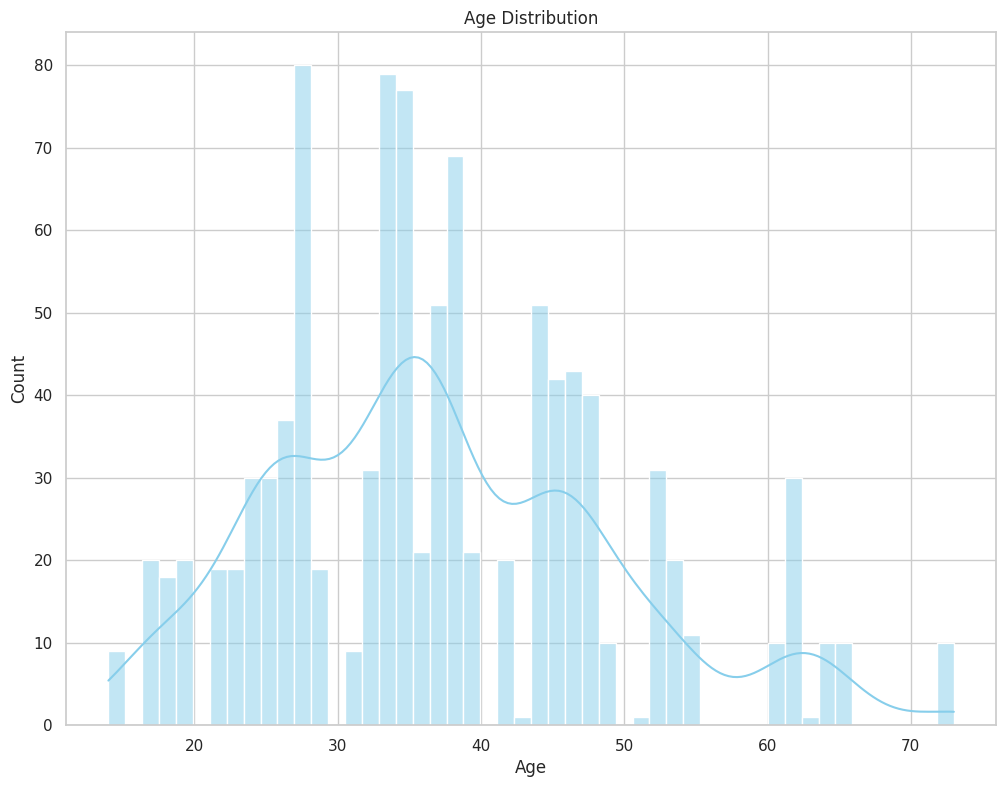

Mean Age: 37.174
Median Age: 36.0
Mode Age: 35


In [21]:
plt.figure(figsize=(12, 9))
sns.histplot(df2['Age'], bins=50, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

mean_age = df2['Age'].mean()
median_age = df2['Age'].median()
mode_age = df2['Age'].mode()[0]

print(f"Mean Age: {mean_age}")
print(f"Median Age: {median_age}")
print(f"Mode Age: {mode_age}")

Plotting the gender distributions of the patients

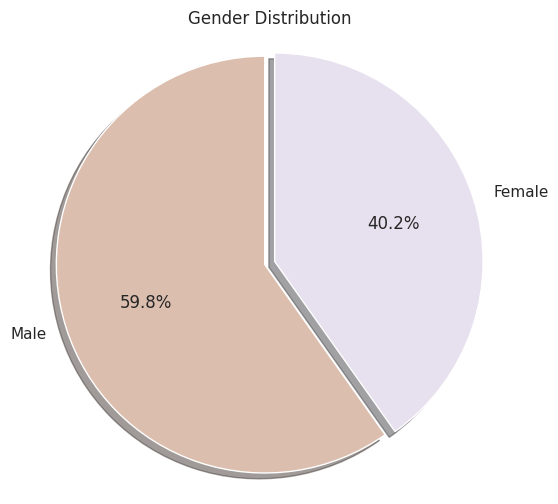

In [22]:
gender_counts = df2["Gender"].value_counts()

colors = ["#dcbeaf", "#e7e0ee"]
explode = (0.05, 0)

plt.figure(figsize=(6, 6))
plt.pie(
    gender_counts,
    labels=gender_counts.index,
    autopct="%1.1f%%",
    startangle=90,
    colors=colors,
    explode=explode,
    shadow=True
)
plt.title("Gender Distribution")
plt.axis("equal")
plt.show()

Plotting the risks of Lung Cancer of the patients

<ipython-input-23-80d4d314cecc>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df2, x='Level', palette='Set2')


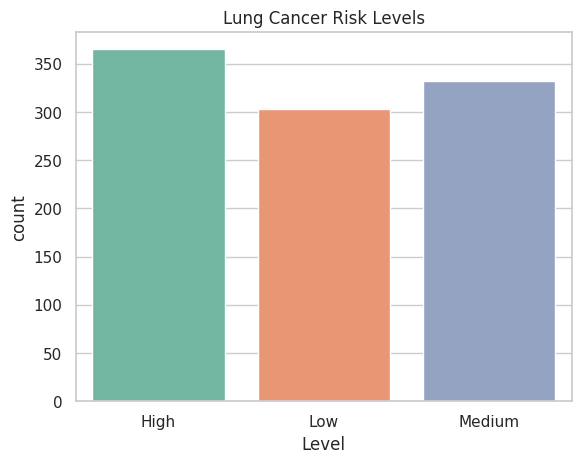

In [23]:
sns.countplot(data=df2, x='Level', palette='Set2')
plt.title('Lung Cancer Risk Levels')
plt.show();

Age vs Lung Cancer Boxplot

<ipython-input-24-db9e4c8384cb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df2, x='Level', y='Age', palette='coolwarm')


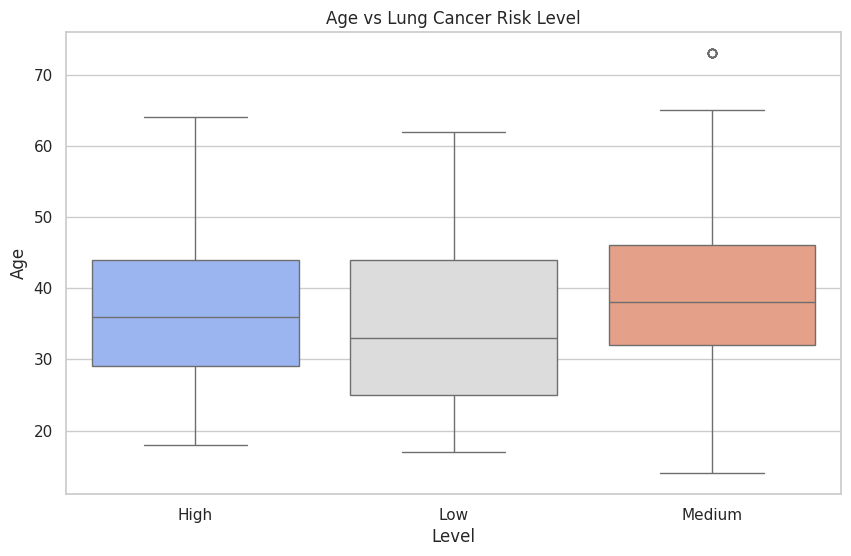

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df2, x='Level', y='Age', palette='coolwarm')
plt.title('Age vs Lung Cancer Risk Level')
plt.show()

Pairplot of the selected columns

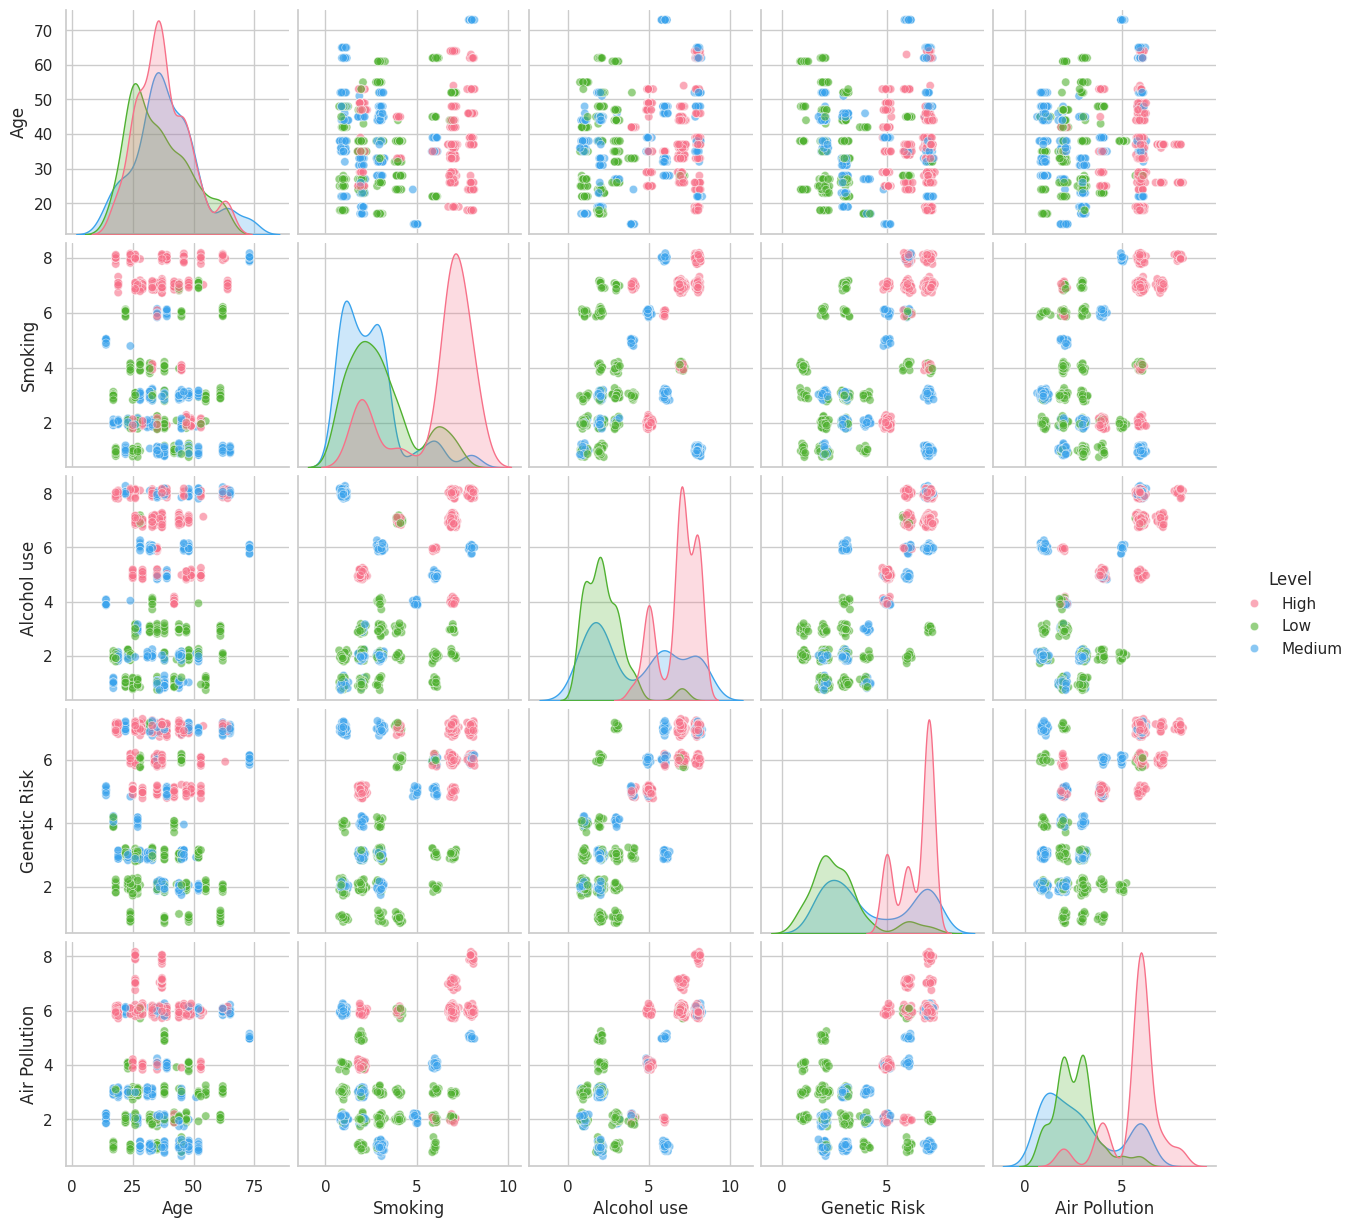

In [25]:
selected = ['Age', 'Smoking', 'Alcohol use', 'Genetic Risk', 'Air Pollution', 'Level']
df_jittered = df2.copy()
jitter_cols = ['Smoking', 'Alcohol use', 'Genetic Risk', 'Air Pollution']

for col in jitter_cols:
    df_jittered[col] = df_jittered[col] + np.random.normal(0, 0.1, size=len(df2))

sns.pairplot(df_jittered[selected], hue='Level', palette='husl', plot_kws={'alpha': 0.6});

Correlation between the columns

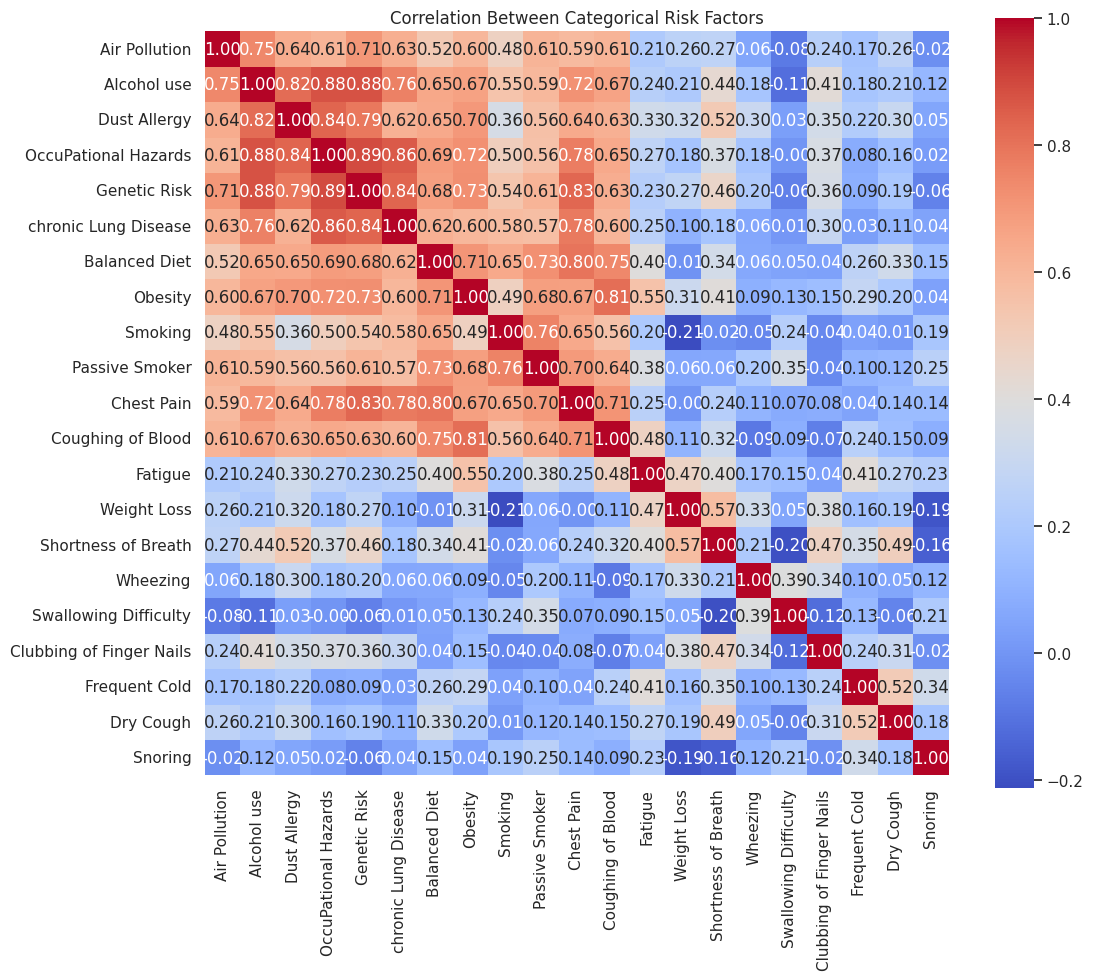

In [26]:
categorical_cols = df2.drop(columns=['Age', 'Gender', 'Level']).columns
plt.figure(figsize=(12, 10))
corr_matrix = df2[categorical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Between Categorical Risk Factors")
plt.show()

# Hypothesis Tests

This section will be about some hypothesis on the causes of lung cancer. The two datasets will be compared using hypothesis tests on the same hypotheses.

1. Hypothesis: Smoking regularly affects the risk of lung cancer.

*   **Null Hypothesis (H₀)**: Smoking and lung cancer are independent
*   **Alternative Hypothesis (H₁)**: Smoking and lung cancer are associated

Dataset 1

In [27]:
df["SMOKING"] = df["SMOKING"].map({"Yes": 1, "No": 0})
df["LUNG_CANCER"] = df["LUNG_CANCER"].map({"YES": 1, "NO": 0})

contingency_table = pd.crosstab(df["SMOKING"], df["LUNG_CANCER"])

# --- Run chi-square test ---
chi2, p, dof, expected = chi2_contingency(contingency_table)

# --- Print results ---
print("Contingency Table:\n", contingency_table)
print("\nChi-square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("P-value:", p)

# --- Interpret result ---
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: Smoking is associated with lung cancer.")
else:
    print("Fail to reject the null hypothesis: No significant association between smoking and lung cancer.")

Contingency Table:
 LUNG_CANCER    0    1
SMOKING              
0            765  762
1            717  756

Chi-square Statistic: 0.5510111488430194
Degrees of Freedom: 1
P-value: 0.45790483338496013
Fail to reject the null hypothesis: No significant association between smoking and lung cancer.


Dataset 2

In [28]:
df2["Level"] = df2["Level"].map({"Low": 0, "Medium": 1, "High": 2})
contingency_table = pd.crosstab(df2['Smoking'], df2['Level'])

# Perform the Chi-Square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Output results
print("Contingency Table:\n", contingency_table)
print("Chi-Square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("P-Value:", p_value)

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Smoking is associated with lung cancer.")
else:
    print("Fail to reject the null hypothesis: No significant association between smoking and lung cancer.")

Contingency Table:
 Level      2   0    1
Smoking              
1          0  61  120
2         70  81   71
3          0  71  101
4         19  40    0
5          0   0   10
6         10  30   20
7        187  20    0
8         79   0   10
Chi-Square Statistic: 684.4965209399204
Degrees of Freedom: 14
P-Value: 5.246169667913276e-137
Reject the null hypothesis: Smoking is associated with lung cancer.


According to the first dataset, smoking regularly does not have a significant relation with lung cancer. However, the test for the second dataset tells us the otherwise.

2. Hypothesis: Having chronic lung diseases affect the risk of lung cancer.

*   **Null Hypothesis (H₀)**: Chronic lung diseases and lung cancer are independent
*   **Alternative Hypothesis (H₁)**: Chronic lung diseases and lung cancer are associated



Dataset 1

In [29]:
df["CHRONIC_DISEASE"] = df["CHRONIC_DISEASE"].map({"Yes": 1, "No": 0})

contingency_table = pd.crosstab(df["CHRONIC_DISEASE"], df["LUNG_CANCER"])

# --- Run chi-square test ---
chi2, p, dof, expected = chi2_contingency(contingency_table)

# --- Print results ---
print("Contingency Table:\n", contingency_table)
print("\nChi-square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("P-value:", p)

# --- Interpret result ---
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: Chronic diseases are associated with lung cancer.")
else:
    print("Fail to reject the null hypothesis: No significant association between chronic diseases and lung cancer.")

Contingency Table:
 LUNG_CANCER        0    1
CHRONIC_DISEASE          
0                719  752
1                763  766

Chi-square Statistic: 0.27462898733847857
Degrees of Freedom: 1
P-value: 0.6002433756617297
Fail to reject the null hypothesis: No significant association between chronic diseases and lung cancer.


Dataset 2

In [30]:
contingency_table = pd.crosstab(df2['chronic Lung Disease'], df2['Level'])

# Perform the Chi-Square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Output results
print("Contingency Table:\n", contingency_table)
print("Chi-Square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("P-Value:", p_value)

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Chronic diseases are associated with lung cancer.")
else:
    print("Fail to reject the null hypothesis: No significant association between chronic diseases and lung cancer.")

Contingency Table:
 Level                   2   0    1
chronic Lung Disease              
1                       0  50    0
2                       0  82   91
3                       0  81   60
4                      70  20   51
5                      10  40   30
6                     198  10  100
7                      87  20    0
Chi-Square Statistic: 585.1295399409582
Degrees of Freedom: 12
P-Value: 1.5853456732363079e-117
Reject the null hypothesis: Chronic diseases are associated with lung cancer.


According to the first dataset, chronic lung diseases regularly do not have a significant relation with lung cancer. However, the test for the second dataset tells us the otherwise.



3. Hypothesis: Gender has a relation with lung cancer.

*   **Null Hypothesis (H₀)**: Gender and lung cancer is independent
*   **Alternative Hypothesis (H₁)**: Gender and lung cancer is associated



Dataset 1

In [31]:
df["GENDER"] = df["GENDER"].map({"Male": 1, "Female": 2})

contingency_table = pd.crosstab(df["GENDER"], df["LUNG_CANCER"])

# --- Run chi-square test ---
chi2, p, dof, expected = chi2_contingency(contingency_table)

# --- Print results ---
print("Contingency Table:\n", contingency_table)
print("\nChi-square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("P-value:", p)

# --- Interpret result ---
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: Gender is associated with lung cancer.")
else:
    print("Fail to reject the null hypothesis: No significant association between gender and lung cancer.")

Contingency Table:
 LUNG_CANCER    0    1
GENDER               
1            760  754
2            722  764

Chi-square Statistic: 0.7158403950228966
Degrees of Freedom: 1
P-value: 0.3975117338177119
Fail to reject the null hypothesis: No significant association between gender and lung cancer.


Dataset 2

In [32]:
contingency_table = pd.crosstab(df2['Gender'], df2['Level'])

# Perform the Chi-Square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Output results
print("Contingency Table:\n", contingency_table)
print("Chi-Square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("P-Value:", p_value)

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Gender is associated with lung cancer.")
else:
    print("Fail to reject the null hypothesis: No significant association between gender and lung cancer.")

Contingency Table:
 Level     2    0    1
Gender               
Female  113  154  135
Male    252  149  197
Chi-Square Statistic: 27.22494142912069
Degrees of Freedom: 2
P-Value: 1.2251212802771069e-06
Reject the null hypothesis: Gender is associated with lung cancer.


According to the first dataset, gender regularly do not have a significant relation with lung cancer. However, the test for the second dataset tells us the otherwise.


Even though all of the test results were different for both datasets, the reason may only be the sizes of them. If both of the datasets had 10k+ patients, the result might have been similar.